In [1]:
import pandas as pd
import numpy as np

## Description of the dataset

In [2]:
hd = pd.read_csv('framingham.csv')
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## First 10 values from the dataset

In [3]:
hd.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


## Total samples and attributes in the dataset

In [4]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


## Information about missing data
### Column-wise count of missing values and count of rows with values missing

In [5]:
print('Missing values: ')
print(hd.isnull().sum())
mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)
tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


## Distribution of data based on the label

In [6]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


In [7]:
import matplotlib.pyplot as plt
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

<Figure size 640x480 with 1 Axes>

## Dropping rows with missing values

In [8]:
hd.drop(['education'], axis = 1, inplace = True)
hd.dropna(axis = 0, inplace = True)
hd.shape

(3751, 15)

## Using Random Forest to determine feature importance

In [9]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr = RFR(random_state = 1, n_estimators = 1000, n_jobs = -1)
x = hd.iloc[:, :-1]
y = hd.iloc[:, -1]
rfr.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

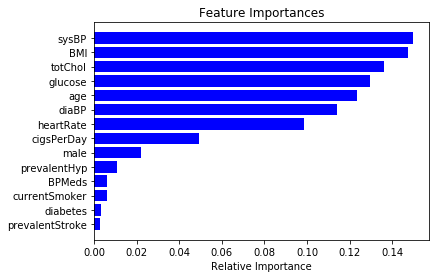

In [10]:
features = hd.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Verifying the results of the Random Forest Classifier
### The first Logistic Regression model is trained on all features, the second one is trained on the most important features. We binarize the output to tackle the class imbalance.

In [11]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(C = 0.01, fit_intercept = True, random_state = 0, max_iter = 1000, solver = 'lbfgs')

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 0)

### All features

In [13]:
lr.fit(x_train, y_train)
y1 = lr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y1)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y1))
conf_matrix

Accuracy: 0.8601864181091877


,Predicted: 0,Predicted: 1
Actual:0,642,5
Actual:1,100,4


In [14]:
lr.coef_

array([[ 0.23027376,  0.06929729,  0.01258915,  0.02776834,  0.00425198,
         0.01050499,  0.06462048,  0.0123319 ,  0.00194642,  0.0181435 ,
        -0.00380368,  0.0163506 , -0.00534343,  0.00811245]])

In [15]:
yprob = lr.predict_proba(x_test)
yprob[10:20]

array([[0.92801922, 0.07198078],
       [0.93273761, 0.06726239],
       [0.92532585, 0.07467415],
       [0.92080918, 0.07919082],
       [0.93435376, 0.06564624],
       [0.91035954, 0.08964046],
       [0.75183427, 0.24816573],
       [0.73643646, 0.26356354],
       [0.8752766 , 0.1247234 ],
       [0.90712621, 0.09287379]])

In [16]:
from sklearn.preprocessing import binarize
ypred = binarize(yprob, 0.15)[:, 1]
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.6671105193075899


,Predicted: 0,Predicted: 1
Actual:0,437,210
Actual:1,40,64


### Selected features

In [17]:
x_train = x_train[['sysBP', 'BMI', 'totChol', 'glucose', 'age', 'diaBP', 'heartRate', 'cigsPerDay', 'male']]
x_test = x_test[['sysBP', 'BMI', 'totChol', 'glucose', 'age', 'diaBP', 'heartRate', 'cigsPerDay', 'male']]

In [18]:
lr.fit(x_train, y_train)
y1 = lr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y1)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y1))
conf_matrix

Accuracy: 0.8601864181091877


,Predicted: 0,Predicted: 1
Actual:0,642,5
Actual:1,100,4


In [19]:
lr.coef_

array([[ 0.01888914,  0.01630477,  0.00191521,  0.0081437 ,  0.06910197,
        -0.00357268, -0.00546744,  0.02799429,  0.22865675]])

In [20]:
yprob = lr.predict_proba(x_test)
yprob[10:20]

array([[0.92646764, 0.07353236],
       [0.93481786, 0.06518214],
       [0.92282843, 0.07717157],
       [0.92584488, 0.07415512],
       [0.93339644, 0.06660356],
       [0.90604667, 0.09395333],
       [0.75645587, 0.24354413],
       [0.74388547, 0.25611453],
       [0.87344201, 0.12655799],
       [0.91055295, 0.08944705]])

In [21]:
from sklearn.preprocessing import binarize
ypred = binarize(yprob, 0.15)[:, 1]
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.6631158455392809


,Predicted: 0,Predicted: 1
Actual:0,436,211
Actual:1,42,62


## Using SMOTE and NearMiss to handle class imbalance

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 0)

In [23]:
from imblearn.over_sampling import SMOTE as smote
smt = smote()
x_train, y_train = smt.fit_sample(x_train, y_train)
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.6644474034620506


,Predicted: 0,Predicted: 1
Actual:0,435,212
Actual:1,40,64


In [24]:
from imblearn.under_sampling import NearMiss as NM
nm = NM()
x_train, y_train = nm.fit_sample(x_train, y_train)
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.6644474034620506


,Predicted: 0,Predicted: 1
Actual:0,435,212
Actual:1,40,64


## Applying PCA

Text(0, 0.5, 'cumulative explained variance')

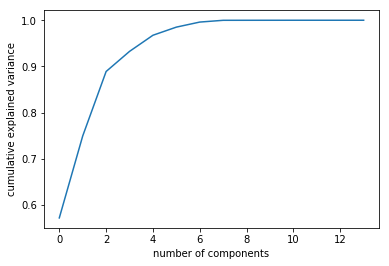

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [41]:
print(pca.singular_values_)
x_new = pd.DataFrame(pca.transform(x))
x_new.head()

[2764.91562172 1540.13489582 1366.62468952  762.99745644  683.66675583
  485.01113106  382.55343782  226.06143204   27.89575373   19.98672129
   19.01495494   10.01985598    7.82310483    4.52742429]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-46.570691,-16.450101,14.137627,-2.297446,12.900346,-5.084797,3.320551,3.068280,0.729668,-0.062019,0.192809,0.036300,-0.007050,-0.002528
1,11.322619,-11.373381,4.331773,5.852328,21.942380,-3.250313,-1.576978,2.925218,-0.229373,0.192769,0.207166,0.010614,-0.002941,-0.001390
2,6.261837,-14.366625,-2.880245,8.212591,-6.263732,1.426758,0.578776,0.294512,0.401488,0.239684,-0.190989,0.008438,0.023458,-0.000559
3,-7.288020,29.859536,-1.995812,7.353144,-24.540740,7.287624,-8.873100,1.080363,-0.935318,-0.376222,0.149819,-0.122709,-0.120343,-0.009221
4,47.013067,-6.383464,8.113030,17.225813,-2.123228,-2.123280,0.194431,-2.698705,-0.541791,0.256009,0.000773,-0.010249,-0.030853,0.002209


In [64]:
x_pca = x_new.iloc[:, :8]
y_pca = y
x_pca.head()

,0,1,2,3,4,5,6,7
0,-46.570691,-16.450101,14.137627,-2.297446,12.900346,-5.084797,3.320551,3.068280
1,11.322619,-11.373381,4.331773,5.852328,21.942380,-3.250313,-1.576978,2.925218
2,6.261837,-14.366625,-2.880245,8.212591,-6.263732,1.426758,0.578776,0.294512
3,-7.288020,29.859536,-1.995812,7.353144,-24.540740,7.287624,-8.873100,1.080363
4,47.013067,-6.383464,8.113030,17.225813,-2.123228,-2.123280,0.194431,-2.698705


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_pca, test_size = .20, random_state = 0)
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred))
conf_matrix

Accuracy: 0.8628495339547271


,Predicted: 0,Predicted: 1
Actual:0,643,4
Actual:1,99,5
